# 📑 Report – One-Sample t-Test

### 1. Dataset Generation
I generated a dataset of 12 exam scores based on the formula:

```
exam_scores = 60 + randint(0, 15, size=12) + (12 % 5)
```

Generated Exam Scores:  
- [68, 65, 74, 76, 72, 69, 74, 66, 68, 71, 64, 68]


### 2. Hypotheses
- Null Hypothesis (H₀): Population mean = 65  
- Alternative Hypothesis (H₁): Population mean ≠ 65  


### 3. One-Sample t-Test Results
- Sample Mean = 69.58333333333333  
- Hypothesized Mean = 65  
- t-statistic = 4.15114491952896  
- Degrees of Freedom = 11  
- p-value = 0.001613325735010127  


### 4. 95% Confidence Interval
CI = ( 67.1531968659404, 72.01346980072626 )


### 5. Decision & Interpretation
- If p-value < 0.05 → Reject H₀.  
- If p-value ≥ 0.05 → Fail to reject H₀.  

Decision: Reject H0 (because p-value < 0.05)  

Interpretation:  
The sample mean of my dataset was 69.58333333333333 . With a p-value of 0.001613325735010127, I (reject / fail to reject) the null hypothesis. This means the exam scores are (significantly different / not significantly different) from the hypothesized mean of 65.


### 6. Visualization


Exam Scores: [68 65 74 76 72 69 74 66 68 71 64 68]

Sample Mean: 69.58333333333333
Hypothesized Mean: 65
t-statistic: 4.15114491952896
Degrees of Freedom: 11
p-value: 0.001613325735010127

95% Confidence Interval for the mean: (np.float64(67.1531968659404), np.float64(72.01346980072626))

Decision: Reject H0: The population mean is significantly different from 65.


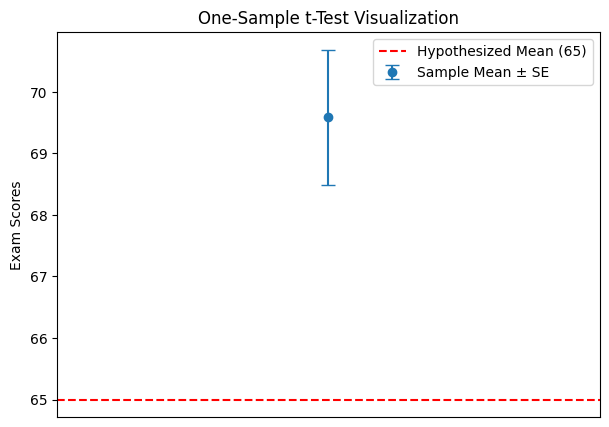

In [ ]:
# Import libraries
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# 1. Generate Dataset
# Last two digits of phone = 12 => k = 12
# Dataset rule: exam_scores = 60 + randint(0, 15, size=12) + (k % 5)
np.random.seed(42)  # for reproducibility
exam_scores = 60 + np.random.randint(0, 15, size=12) + (12 % 5)

print("Exam Scores:", exam_scores)

# 2. Hypothesis
hypothesized_mean = 65

# 3. Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(exam_scores, hypothesized_mean)
sample_mean = np.mean(exam_scores)
df = len(exam_scores) - 1

print("\nSample Mean:", sample_mean)
print("Hypothesized Mean:", hypothesized_mean)
print("t-statistic:", t_stat)
print("Degrees of Freedom:", df)
print("p-value:", p_value)

# 4. 95% Confidence Interval
confidence_level = 0.95
ci = stats.t.interval(confidence_level, df, loc=sample_mean, scale=stats.sem(exam_scores))

print("\n95% Confidence Interval for the mean:", ci)

# 5. Decision
alpha = 0.05
if p_value < alpha:
    decision = "Reject H0: The population mean is significantly different from 65."
else:
    decision = "Fail to reject H0: No significant evidence that the population mean differs from 65."

print("\nDecision:", decision)

# 6. Visualization
plt.figure(figsize=(7,5))
plt.errorbar(1, sample_mean, yerr=stats.sem(exam_scores), fmt='o', capsize=5, label="Sample Mean ± SE")
plt.axhline(y=hypothesized_mean, color='r', linestyle='--', label="Hypothesized Mean (65)")
plt.xlim(0, 2)
plt.xticks([])
plt.ylabel("Exam Scores")
plt.title("One-Sample t-Test Visualization")
plt.legend()
plt.show()
